## Prerequisite Code

In [ ]:
!pip install wikipedia
import wikipedia
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=8bc9dcc77d40928b3c57153401ac940f2277d45c287316902a8e1c066a8d527a
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia




---



## Questions:

1. (2.5) In this assignment, you will use the wikipedia page content for the 40 pages below to perform cluster analysis. The pages can be grouped into 4 general topics: artificial intelligence, sports, college courses/majors, and animals. First, run the code line below to create the topics object. Then, develop a dataset containing the content from the respective Wikipedia pages and prepare the TF-IDF-weighted Document Term Matrix.


In [ ]:
topics = ['data science','business analytics', 'artificial intelligence','computational statistics', 'linguistics', 'expert systems', 'natural language processing', 'motion analysis', 'basketball', 'swimming','diving', 'baseball', 'football', 'soccer', 'hockey', 'gymnastics', 'lacrosse', 'operations management', 'marketing', 'economics', 'mathematics', 'biology', 'chemistry', 'statistics', 'computer science', 'engineering', 'zebra', 'dolphin', 'whale', 'horse', 'sheep', 'monkey', 'kangaroo', 'leopard', 'tiger', 'wolf', 'snake', 'frog', 'hedgehog']

In [ ]:
wikipedia_list=[]
for topic in topics:
   print("retrieving: ", topic)
   wikipedia_list.append(wikipedia.page(topic).content)

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(wikipedia_list)

retrieving:  data science
retrieving:  business analytics
retrieving:  artificial intelligence
retrieving:  computational statistics
retrieving:  linguistics
retrieving:  expert systems
retrieving:  natural language processing
retrieving:  motion analysis
retrieving:  basketball
retrieving:  swimming
retrieving:  diving
retrieving:  baseball
retrieving:  football
retrieving:  soccer
retrieving:  hockey
retrieving:  gymnastics
retrieving:  lacrosse
retrieving:  operations management
retrieving:  marketing
retrieving:  economics
retrieving:  mathematics
retrieving:  biology
retrieving:  chemistry
retrieving:  statistics
retrieving:  computer science
retrieving:  engineering
retrieving:  zebra
retrieving:  dolphin
retrieving:  whale
retrieving:  horse
retrieving:  sheep
retrieving:  monkey
retrieving:  kangaroo
retrieving:  leopard
retrieving:  tiger
retrieving:  wolf
retrieving:  snake
retrieving:  frog
retrieving:  hedgehog




---

<br>

2. (a) (3) Perform elbow analysis on the TF-IDF vectorized dataset. In your plot, consider a minimum of 2 clusters and a maximum of 15 clusters. For reproducible results, set the `random_state` argument in `KMeans()` to 123.

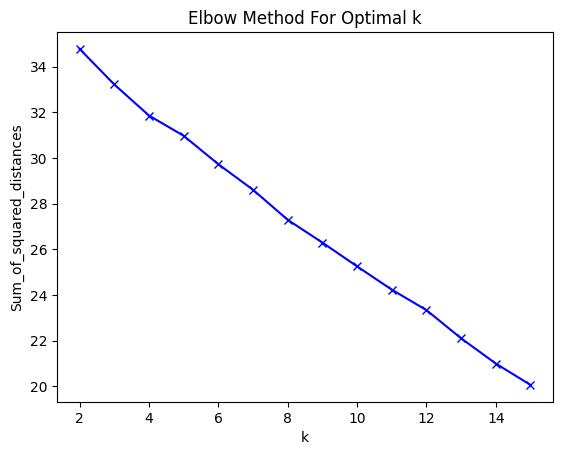

In [ ]:
Sum_of_squared_distances = []
K = range(2, 16)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10, random_state=123)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

<hr>
<br>

2. (b) (3) Based on the plot, how many clusters should there be? Does this value of k align with the expected number of groups? Explain.

There should be 4 clusters. So yes, the value of K align with the expected number of groups that we mentioned above in the assignment (artificial intelligence, sports, college majors/courses, and animals.). How we verify the cluster is to check the plot above and see where the line flatters.

<hr>
<br>

3. (a) (2.5) Develop a KMeans clustering solution using the expected number of groups as k.

In [ ]:
true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10, random_state=123)
model.fit(X)

labels = model.labels_
wiki_cl = pd.DataFrame(list(zip(topics, labels)), columns=['topics', 'cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                         topics  cluster
0                  data science        0
3      computational statistics        0
6   natural language processing        0
24             computer science        0
23                   statistics        0
20                  mathematics        0
35                         wolf        1
31                       monkey        1
29                        horse        1
26                        zebra        1
25                  engineering        1
22                    chemistry        1
21                      biology        1
18                    marketing        1
17        operations management        1
19                    economics        1
2       artificial intelligence        1
4                   linguistics        1
1            business analytics        1
10                       diving        1
9                      swimming        1
5                expert systems        1
7               motion analysis        1
16              

3. (b) (3) Does the KMeans clustering solution assign the expected cluster memberships to the documents? Explain.

No, it does not. Because once we look at the column of the cluster above we see that sheep and gymnastics belong to same cluster number. Since we have 4 main groups sheep and gymnastics can't be in the same group.

<hr>

4. (a) (3) Next, you will perform hierachical clustering. By default, `AgglomerativeClustering()` sets k = 2 (`n_clusters = 2`). Instead, set the `n_clusters` argument equal to the expected number of clusters. View cluster membership output as a dataframe.

In [ ]:
true_k = 4

# Perform Agglomerative Clustering
hierarchical_model = AgglomerativeClustering(n_clusters=true_k, linkage='ward', metric='euclidean')
hierarchical_labels = hierarchical_model.fit_predict(X.toarray())

hierarchical_cl = pd.DataFrame(list(zip(topics, hierarchical_labels)), columns=['topics', 'cluster'])
print(hierarchical_cl.sort_values(by=['cluster']))

                         topics  cluster
0                  data science        0
23                   statistics        0
20                  mathematics        0
24             computer science        0
6   natural language processing        0
25                  engineering        0
4                   linguistics        0
2       artificial intelligence        0
5                expert systems        0
3      computational statistics        0
16                     lacrosse        1
14                       hockey        1
13                       soccer        1
12                     football        1
8                    basketball        1
11                     baseball        1
33                      leopard        2
34                        tiger        2
30                        sheep        2
29                        horse        2
28                        whale        2
35                         wolf        2
27                      dolphin        2
26              

4. (b) (3) Do the clusters created using hierarchical cluster analysis align with the expected results? Explain.

Even though hierarchical cluster analysis slightly looks better than Kmeans clustering the answer is No. Since again when we check the result for example monkey and business analytics are in the same group which not correct.

<hr>